<a href="https://colab.research.google.com/github/NeelKanwal/BERTOLOGY-Based-Extractive-Summarization-for-Clinial-Notes/blob/master/BaslineApproaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U spacy
!python -m spacy download en_core_web_lg
!pip install jsonlines

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.2.4)
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Loading  Data from a Demo of 100 Summaries. 
https://physionet.org/content/mimiciii-demo/1.4/


In [0]:
import jsonlines as js
book = []
with js.open("notes.ndjson") as reader:
  num = 0
  for summary in reader:
    if num<100:
        book.append(summary[2])
        num = num + 1

clinical_notes = [" ".join( sum(book[i],[])) for i in range(100)]

In [4]:
# Total Discharge summaries we have for establishing the experiment
print(len(clinical_notes))

100


In [0]:
#Evaluation Criteria Based on probabilty distribution sripada et al .
from scipy.stats import entropy
from scipy.spatial import distance

from collections import Counter
from collections import OrderedDict

def kld(summ, org): 
        dist_original=Counter(org.lower().split())
        dist_summary=Counter(summ.lower().split())
        q = list(dist_original.values())
        p=list(dist_summary.values())
        a=min(len(p),len(q))
        return entropy(p[0:a],qk=q[0:a])
 
def jsd(summ,org):
        dist_original=Counter(org.lower().split())
        dist_summary=Counter(summ.lower().split())
        p = list(dist_original.values())
        q = list(dist_summary.values())
        a=min(len(p),len(q))
        return distance.jensenshannon(p[0:a],q[0:a])

#Frequency Based Summarizer


In [0]:
import spacy
from collections import Counter
from string import punctuation
import en_core_web_lg
nlp = en_core_web_lg.load()
# nlp = spacy.load("en_core_web_lg")

In [0]:
# Function using POS summarization based on idea similar to Edmundson et al
def summarize(text):
    keyword = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
    doc = nlp(text.lower())
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            keyword.append(token.text)
    
    freq_word = Counter(keyword)
    max_freq = Counter(keyword).most_common(1)[0][1]
    for w in freq_word:
        freq_word[w] = (freq_word[w]/max_freq)
        
    sent_strength={}
    for sent in doc.sents:
        for word in sent:
            if word.text in freq_word.keys():
                if sent in sent_strength.keys():
                    sent_strength[sent]+=freq_word[word.text]
                else:
                    sent_strength[sent]=freq_word[word.text] 
    summary = []
    
    sorted_x = sorted(sent_strength.items(), key=lambda kv: kv[1], reverse=True)
    limit=len(sorted_x)/15
    counter = 0
    for i in range(len(sorted_x)):
        summary.append(str(sorted_x[i][0]).capitalize())

        counter += 1
        if(counter >= limit):
            break
            
    return ' '.join(summary)

In [39]:
summary=[summarize(note) for note in clinical_notes]
summary[0]

'Disp tablet s refills ranitidine hcl mg tablet sig one tablet po daily daily disp tablet s refills tramadol mg tablet sig Tablet sig two tablet po q6h every hours as needed for pain tablet s senna mg tablet sig One tablet po daily daily disp tablet s refills furosemide mg tablet sig Mitral valve repair coronary artery bypass graft x left internal mammary artery to left anterior descending history of present illness year old female who was told she had mvp since age currently quite active but has noticed some dyspnea on exertion when walking up hills most recent echo revealed severe mvp and moderate to severe Daily daily disp tablet delayed release e.c. s refills docusate sodium mg capsule sig one capsule po bid times Disp tablet er particles crystals s refills discharge disposition home with service facility hospitaltoken vna discharge diagnosis mitral regurgitation coronary artery artery disease s Aspirin mg tablet delayed release e.c. sig one tablet delayed release e.c. po'

In [40]:
len(summary[0])

989

In [41]:
from collections import Counter
from collections import OrderedDict
#  forming a frequency distribution for words
dist_original=Counter(clinical_notes[0].lower().split())
dis_summary=Counter(summary[0].lower().split())

print(list(dist_original.values()))
print(list(dis_summary.values()))

[3, 3, 12, 7, 5, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 16, 2, 3, 1, 1, 3, 8, 2, 1, 8, 5, 3, 4, 6, 3, 3, 17, 11, 1, 1, 15, 1, 2, 5, 1, 1, 1, 1, 1, 1, 12, 1, 12, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 3, 1, 3, 16, 3, 3, 1, 18, 1, 2, 2, 4, 2, 2, 2, 2, 5, 12, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 11, 4, 2, 2, 6, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 11, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 15, 3, 18, 1, 1, 7, 1, 2, 14, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 15, 3, 1, 1, 1, 1, 4, 1, 8, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1

In [42]:
kld_freq=[kld(clinical_notes[i],summary[i]) for i in range(100)]
print(kld_freq)
jsd_freq=[jsd(summ,org) for org,summ in zip(clinical_notes,summary)]
print(jsd_freq)

[0.7199990163091441, 1.288577094003375, 0.6876781653361953, 1.0548275305953054, 0.822106467044532, 1.0250455035798383, 0.7642230697261388, 0.8861677097328216, 0.8133151448774971, 1.070300835591361, 0.8902506584557677, 1.0409563178920767, 0.9325518447723371, 0.876780478796326, 0.7527658673801978, 1.109862192707198, 0.9814609731836896, 1.3140823138880307, 0.6336290837851819, 0.5945883813485552, 0.9853710957839535, 0.6425021501485686, 0.7927687220316615, 1.0248072650693685, 0.7909853199013283, 0.917756720574602, 0.7840406497243342, 0.36351808643481, 0.7646289844561274, 0.7901441270581637, 1.3074442360423464, 1.1585353169123405, 0.8390222886295955, 0.7277708334637526, 0.9440759880626365, 1.0119889895584742, 0.4404568982928508, 0.809263712380167, 0.9257424674505709, 0.8088068380486474, 1.1703079980729523, 1.0009809316501646, 0.6645238775763517, 0.9657224564406461, 0.8211600933863579, 0.9475945948239577, 1.0045711656352914, 0.8222920904678139, 0.9173348150335361, 1.0650339501847848, 0.915065

In [43]:
import statistics as sc
print(sc.mean(kld_freq))
print(sc.mean(jsd_freq))

0.8926305501713105
0.42625451795996255


In [12]:
!pip install sumy
!pip install lexrank

     |████████████████████████████████| 92kB 2.5MB/s 
     |████████████████████████████████| 10.0MB 7.4MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21684 sha256=be59f5d3c7597a048bd9a93cd0b6285133054392fc90bf6db565f141f2eeab0c
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=7afccf72882b0b44c7fe6757b187fd8881449ff5ee490e4fe8805b20ec52bca8
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built breadability pycountry
     |████████████████████████████████| 71kB 2.2MB/s 


Algorithm
It uses greedy optimization approach:

Set S={} and d=0
while |S|<= L do:
for i in [1...ND] , di=KL(Ps||PD)
Set S=S + Si with minimum di and d=di
Stop if there is no i such that di:<d

In [0]:
# from sumy.summarizers.kl import KLSummarizer
# from sumy.summarizers import AbstractSummarizer

#Graph Based Summarization



In [44]:
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer 
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
import nltk
nltk.download('punkt')

# parser=PlaintextParser.from_string(clinical_notes,Tokenizer("english"))
summarizer_g = TextRankSummarizer()
summarizer_l = LexRankSummarizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
def graph_summarizer(doc):
      parser=PlaintextParser.from_string(doc,Tokenizer("english"))
      # return summarizer_g(parser.document,5)
      return summarizer_l(parser.document,2)


In [54]:
summary_graph = [graph_summarizer(summ) for summ in clinical_notes]
for sentence in summary_graph[0]:
    print(sentence , end= " ")

sig one tablet delayed release e.c. s refills docusate sodium mg capsule sig one capsule po bid times a day magnesium hydroxide mg ml suspension sig thirty ml po hs at bedtime as needed for constipation atorvastatin mg tablet sig one tablet po daily daily disp tablet s refills furosemide mg tablet sig one tablet po once a day for days disp tablet s refills ranitidine hcl mg tablet sig one tablet po daily daily disp tablet s refills tramadol mg tablet sig one tablet po q6h every hours as needed for pain disp tablet s refills acetaminophen mg tablet sig two tablet po q6h every hours as needed for pain tablet s senna mg tablet sig tablets po bid times a day metoprolol tartrate mg tablet sig three tablet po tid times a day disp tablet s refills potassium chloride meq tablet er particles crystals sig one tablet er particles crystals po once a day for days disp tablet er particles crystals s refills discharge disposition home with service facility hospitaltoken vna discharge diagnosis mitral

In [0]:
final_summ = [None]*100
for i in range(100):
  final_summ[i] = "".join(str(list(summary_graph[i])))

In [56]:
final_summ[0]

'[<Sentence: sig one tablet delayed release e.c.>, <Sentence: s refills docusate sodium mg capsule sig one capsule po bid times a day magnesium hydroxide mg ml suspension sig thirty ml po hs at bedtime as needed for constipation atorvastatin mg tablet sig one tablet po daily daily disp tablet s refills furosemide mg tablet sig one tablet po once a day for days disp tablet s refills ranitidine hcl mg tablet sig one tablet po daily daily disp tablet s refills tramadol mg tablet sig one tablet po q6h every hours as needed for pain disp tablet s refills acetaminophen mg tablet sig two tablet po q6h every hours as needed for pain tablet s senna mg tablet sig tablets po bid times a day metoprolol tartrate mg tablet sig three tablet po tid times a day disp tablet s refills potassium chloride meq tablet er particles crystals sig one tablet er particles crystals po once a day for days disp tablet er particles crystals s refills discharge disposition home with service facility hospitaltoken vna 

In [57]:
kld_graph=[kld(final_summ[i],clinical_notes[i]) for i in range(100)]
print(kld_graph)
jsd_graph=[jsd(summ,org) for org,summ in zip(clinical_notes,final_summ)]
print(jsd_graph)

[0.7300056898789489, 1.1694653021133752, 0.6582040562369684, 1.1142263603662046, 0.8318529166860184, 0.8500070481335991, 0.7234898358384443, 0.9397794415946781, 0.726998247614633, 0.8241942675835762, 0.7265543565505864, 0.8975525931393504, 0.7959301455554484, 0.669376027852106, 0.6923054576777433, 0.8430866798024049, 0.8197445230302883, 1.1839705218869996, 0.6701176466628493, 0.6287766841898392, 0.8159473750157457, 0.756643590754108, 0.6906630843858031, 0.8931309728288316, 0.7144985447747672, 0.8300907000246323, 0.834051631125655, 0.37818748694309756, 0.7661089260302357, 0.5496976276423745, 1.1552599696350314, 1.1139611998440782, 0.9708535963995211, 0.7248635204961643, 0.7987247104279331, 1.0527604136198216, 0.4291175146466038, 0.8817568712791295, 0.977064960959994, 0.8256685296408494, 1.1179781921775627, 1.0158723379775443, 0.6275512853238936, 0.889559830760793, 0.86616539695137, 1.015695888958109, 0.9623901921279748, 0.7535301262975973, 0.6733909419467383, 0.9915513212639595, 0.89502

In [58]:
import statistics as sc
print(sc.mean(kld_graph))
print(sc.mean(jsd_graph))

0.8272225975103425
0.40872087266175544


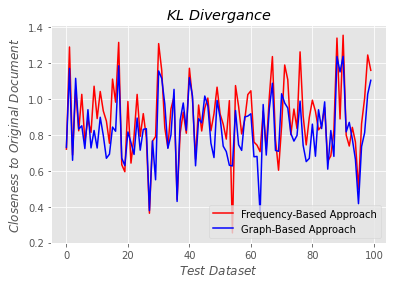

In [59]:
# Graphical Presentation of KLD
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(kld_freq,'r',label= "Frequency-Based Approach")
plt.plot(kld_graph,'b',label="Graph-Based Approach")
plt.xlabel("$Test\ Dataset$")
plt.ylabel("$Closeness\ to\ Original\ Document$")
plt.title("$KL\  Divergance$")
plt.legend(loc= "lower right")
plt.savefig("kld.jpg")
plt.show()

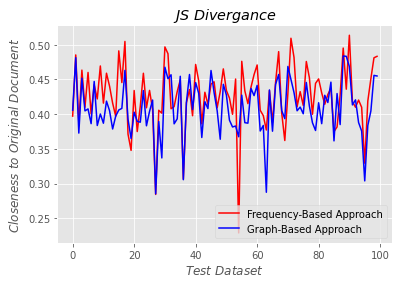

In [60]:
# Graphical Presentation of JSD
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(jsd_freq,'r',label= "Frequency-Based Approach")
plt.plot(jsd_graph,'b',label="Graph-Based Approach")
plt.xlabel("$Test\ Dataset$")
plt.ylabel("$Closeness\ to\ Original\ Document$")
plt.title("$JS\  Divergance$")
plt.legend(loc= "lower right")
plt.savefig("jsd.jpg")
plt.show()
